# Modelling per Country

## Import libraries

In [14]:
import pandas as pd, numpy as np, time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV

# Librerías para plots
from sklearn import tree
#import graphviz
from scipy.stats import norm
from scipy.stats import t
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

## Read file and prepare data 

In [15]:
df = pd.read_csv('/Users/lucas_botella/Downloads/df_covid_processed.csv')
del df['Unnamed: 0']
df = df[df['Code']=='ESP']

In [16]:
df['nurses_per_1000']=df.apply(lambda x: x['nurses_per_1000'] if x['Excess mortality P-scores, all ages Prev 18 days'] <= 0 else 
         x['nurses_per_1000'] - (x['nurses_per_1000']*x['Excess mortality P-scores, all ages Prev 18 days']), axis=1)
df['doctors_per_1000']=df.apply(lambda x: x['doctors_per_1000'] if x['Excess mortality P-scores, all ages Prev 18 days'] <= 0 else 
         x['doctors_per_1000'] - (x['doctors_per_1000']*x['Excess mortality P-scores, all ages Prev 18 days']), axis=1)
df['beds_per_1000']=df.apply(lambda x: x['beds_per_1000'] if x['Excess mortality P-scores, all ages Prev 18 days'] <= 0 else 
         x['beds_per_1000'] - (x['beds_per_1000']*x['Excess mortality P-scores, all ages Prev 18 days']), axis=1)
df

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,...,doctors_per_1000,nurses_per_1000,beds_per_1000,number_of_arrivals,urban_population,total_vaccinations_per_100,%youth_unemployment_total,life_expectancy,"Excess mortality P-scores, all ages Prev 18 days","Excess mortality P-scores, all ages"
630,ESP,2020-03-09,0.737286,1.177286,-1.326429,5.135286,15.092143,1.682714,2.0,1.000000,...,4.0200,5.8700,2.9700,75315000.0,80.08,NaN,32.610001,83.431707,-8.58,-8.98
631,ESP,2020-03-16,1.898000,2.918286,-0.959143,5.734714,24.204143,-1.489857,1.0,1.000000,...,4.0200,5.8700,2.9700,75315000.0,80.08,NaN,32.610001,83.431707,-10.73,-4.93
632,ESP,2020-03-23,-0.694000,2.591714,-0.387857,2.081429,7.938857,-0.530714,1.0,1.000000,...,4.0200,5.8700,2.9700,75315000.0,80.08,NaN,32.610001,83.431707,-8.98,10.43
633,ESP,2020-03-30,-8.591857,8.877714,1.265429,-6.387571,4.796000,-2.775714,1.0,1.000000,...,4.0200,5.8700,2.9700,75315000.0,80.08,NaN,32.610001,83.431707,-4.93,54.49
634,ESP,2020-04-06,-69.795857,-25.347143,19.387714,-61.571429,-57.755143,-45.285714,1.0,1.000000,...,-37.9086,-55.3541,-28.0071,75315000.0,80.08,NaN,32.610001,83.431707,10.43,137.89
635,ESP,2020-04-13,-88.346714,-52.367429,28.020571,-82.204286,-80.632714,-65.734857,1.0,1.000000,...,-215.0298,-313.9863,-158.8653,75315000.0,80.08,NaN,32.610001,83.431707,54.49,156.30
636,ESP,2020-04-20,-90.734857,-56.448857,29.836714,-84.530571,-82.489857,-70.408143,1.0,1.142857,...,-550.2978,-803.5443,-406.5633,75315000.0,80.08,NaN,32.610001,83.431707,137.89,115.22
637,ESP,2020-04-27,-90.877714,-55.204000,30.755286,-85.265286,-82.693857,-73.694000,1.0,1.714286,...,-624.3060,-911.6110,-461.2410,75315000.0,80.08,NaN,32.610001,83.431707,156.30,68.99
638,ESP,2020-05-04,-90.653000,-56.306000,30.081714,-84.224429,-81.265429,-71.183571,1.0,1.000000,...,-459.1644,-670.4714,-339.2334,75315000.0,80.08,NaN,32.610001,83.431707,115.22,34.86
639,ESP,2020-05-11,-89.122571,-53.510286,27.959143,-81.714143,-78.673429,-65.163286,1.0,1.000000,...,-273.3198,-399.1013,-201.9303,75315000.0,80.08,NaN,32.610001,83.431707,68.99,18.77


In [17]:
X=df[df.columns[2:-1]]
y=df['Excess mortality P-scores, all ages']

## Apply model and view results 

pip install xgboost

In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor

## XGBoost Regressor 

### GridSearchCV 

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params, verbose=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [22]:
%%time
grid.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 36.4 s, sys: 396 ms, total: 36.8 s
Wall time: 39.1 s


[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed:   39.1s finished


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None, nthread=-1,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=

In [23]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [24]:
y_pred=grid.best_estimator_.predict(X_test)

## Model evaluation metrics

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 17.394526501262888
mse score is 651.1635730497278
rmse score is 25.517906909653224
r2 score is 0.4909425037263203


In [26]:
y_pred_train=grid.best_estimator_.predict(X_train)

In [27]:
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)

scores = {'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 0.6278279521277073
mse score is 1.1628576968062942
rmse score is 1.0783587978063212
r2 score is 0.9986920457283929


In [34]:
df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_eval['Difference']=np.abs(df_eval['Actual']-df_eval['Predicted'])
#df_eval=df_eval.sort_values('Difference')
df_eval

,Actual,Predicted,Difference
679,18.21,17.431097,0.778903
670,19.49,19.532330,0.042330
641,-0.71,-3.054096,2.344096
657,15.22,15.468989,0.248989
656,15.60,15.059588,0.540412
653,15.47,14.740363,0.729637
680,8.87,9.134358,0.264358
681,1.13,2.521570,1.391570
643,3.36,3.232292,0.127708
651,7.86,8.394762,0.534762


In [35]:
df_eval.Difference.mean()

0.7010985647548331

## Model evaluation plots

Text(0.5, 1.0, 'Difference Histogram')

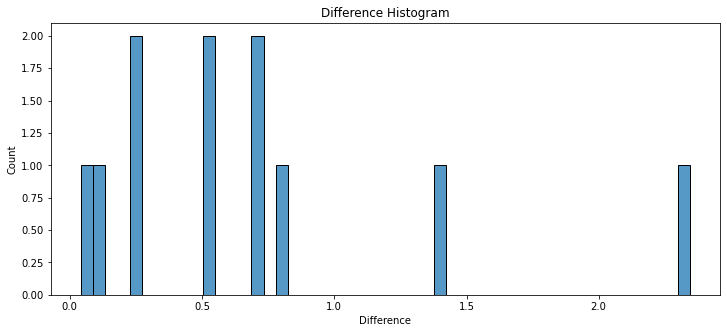

In [36]:
# plot difference hist
f, axes = plt.subplots(figsize=(12,5))
sns.histplot(x='Difference', data=df_eval, kde=False, bins=50, ax=axes);
axes.set_title('Difference Histogram')

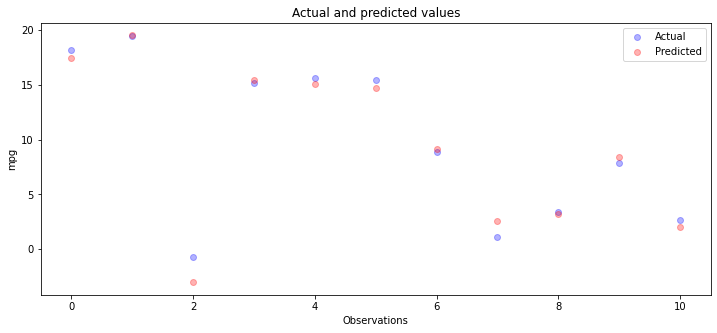

In [37]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(12,5))

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

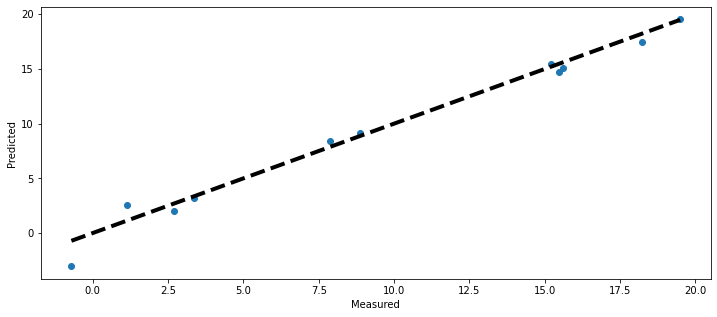

In [38]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:

fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

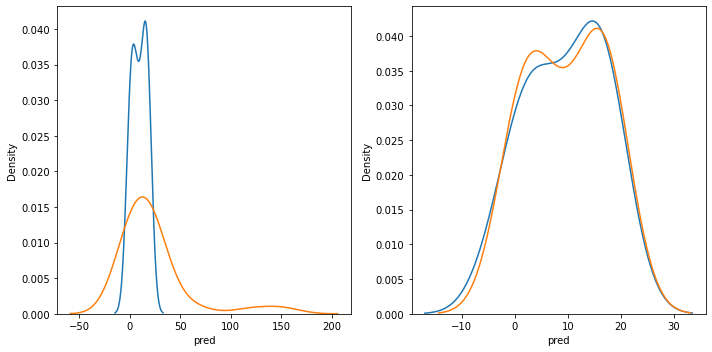

In [39]:
import seaborn as sns
# Hacemos las predicciones y evaluamos los resultados graficamente, tanto en el set de Train como de Test
y_test_pred = y_pred
y_train_pred = y_test

test = y_test
train = y_train

res_df_test = pd.DataFrame({'pred': y_test_pred, 'test': test})
res_df_test['dif'] = np.round(res_df_test['pred']-res_df_test['test'],2)
res_df_test['dif_abs'] = np.round(np.abs(res_df_test['pred']-res_df_test['test']),2)
res_df_test['dif%'] = np.round(100*(res_df_test['pred']-res_df_test['test'])/res_df_test['test'],2)

res_df_train = pd.DataFrame({'pred': y_train_pred, 'test': train})
res_df_train['dif'] = np.round(res_df_train['pred']-res_df_train['test'],2)
res_df_train['dif_abs'] = np.round(np.abs(res_df_train['pred']-res_df_train['test']),2)
res_df_train['dif%'] = np.round(100*(res_df_train['pred']-res_df_train['test'])/res_df_train['test'],2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plot = sns.kdeplot(res_df_train['pred'], ax=axes[0])
plot = sns.kdeplot(res_df_train['test'], ax=axes[0])
plot = sns.kdeplot(res_df_test['pred'], ax=axes[1])
plot = sns.kdeplot(res_df_test['test'], ax=axes[1])
fig.tight_layout()

In [40]:
mae_test = np.round(res_df_test['dif_abs'].mean(),2)
gae_test = np.round(res_df_test['dif_abs'].sum(),2)
error_test_rate_abs = np.round(100*gae_test/res_df_test['test'].sum(),2)
error_test = np.round(res_df_test['dif'].sum(),2)
error_test_rate = np.round(100*error_test/res_df_test['test'].sum(),2)
print('El error absoluto medio es: ', mae_test)
print('El error global es: ', error_test)
print('La tasa de error global es: %',error_test_rate)

El error absoluto medio es:  0.7
El error global es:  -2.76
La tasa de error global es: % -2.58


In [41]:
res_df_test

,pred,test,dif,dif_abs,dif%
679,17.431097,18.21,-0.78,0.78,-4.28
670,19.532330,19.49,0.04,0.04,0.22
641,-3.054096,-0.71,-2.34,2.34,330.15
657,15.468989,15.22,0.25,0.25,1.64
656,15.059588,15.60,-0.54,0.54,-3.46
653,14.740363,15.47,-0.73,0.73,-4.72
680,9.134358,8.87,0.26,0.26,2.98
681,2.521570,1.13,1.39,1.39,123.15
643,3.232292,3.36,-0.13,0.13,-3.80
651,8.394762,7.86,0.53,0.53,6.80


In [42]:
df['Excess mortality P-scores, all ages'].describe()

count     55.000000
mean      20.446727
std       32.087493
min       -8.980000
25%        3.020000
50%       15.470000
75%       21.515000
max      156.300000
Name: Excess mortality P-scores, all ages, dtype: float64

## Feature importance 

In [43]:
import xgboost
from xgboost import plot_importance
from xgboost import plot_tree

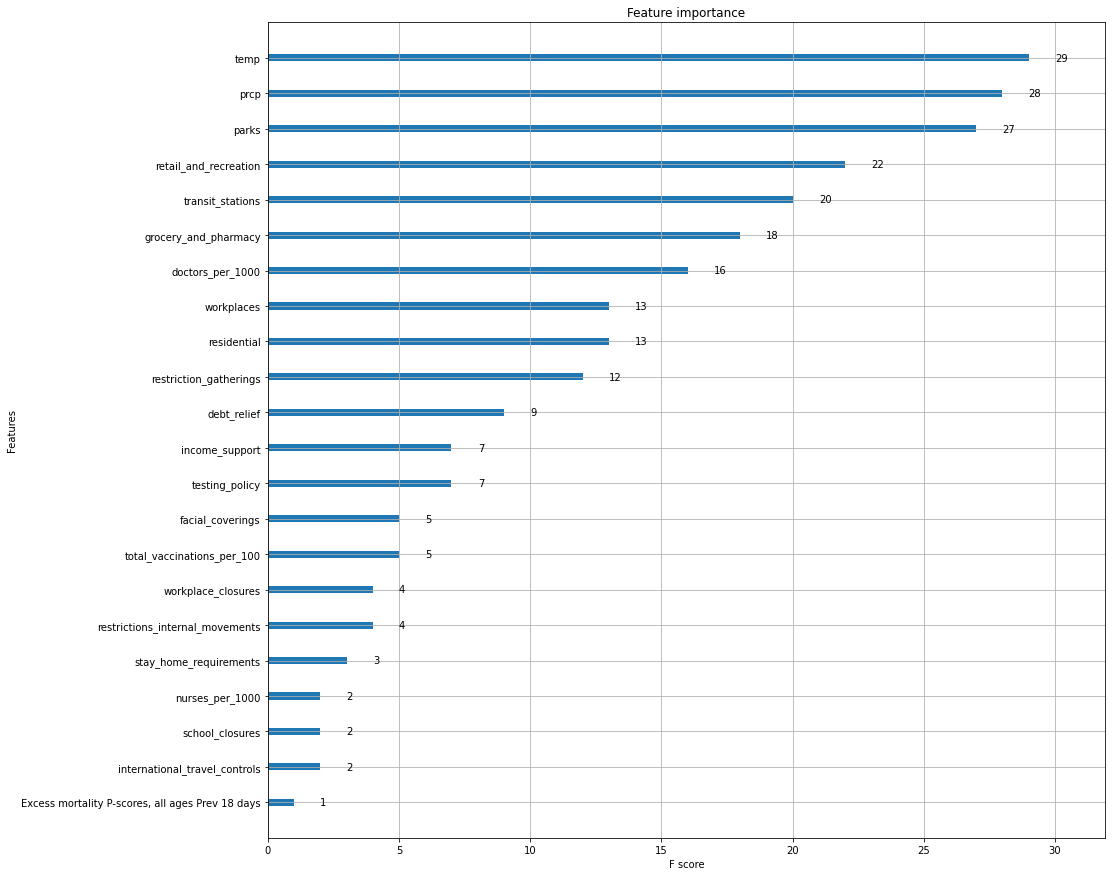

In [45]:
xgboost.plot_importance(grid.best_estimator_)
plt.rcParams['figure.figsize'] = [20, 15]
plt.show()